#### 동영상 링크 : https://youtu.be/j3P_0G1ci-A

In [2]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib
import matplotlib.pyplot as plt
import folium

In [3]:
# 전체 데이터 읽어오기
data = pd.read_csv('data/대구도시철도공사_역별일별시간별승하차인원현황_20210531.csv', encoding='cp949')
data.head()

,월,일,역번호,역명,승하,05~06,06~07,07~08,08~09,09~10,...,15~16,16~17,17~18,18~19,19~20,20~21,21~22,22~23,23~24,일계
0,1,1,1150,설화명곡,승차,26,25,42,57,68,...,132,104,119,81,65,46,37,24,3,1387
1,1,1,1150,설화명곡,하차,4,32,43,47,45,...,93,93,118,126,81,80,98,70,34,1364
2,1,1,1160,화원,승차,13,16,34,75,78,...,177,187,150,76,47,41,37,23,7,1746
3,1,1,1160,화원,하차,2,20,18,56,67,...,152,154,131,105,77,96,122,57,26,1773
4,1,1,1170,대곡,승차,31,52,64,107,120,...,161,191,180,117,63,82,48,40,11,2171


In [4]:
# '승차/하차' 테이블 분리하기
data_up = data[data['승하']=='승차']
data_dw = data[data['승하']=='하차']

In [5]:
# '승하' 컬럼 삭제하기
data_up2 = data_up.drop('승하', axis=1)
data_dw2 = data_dw.drop('승하', axis=1)
data_up2

,월,일,역번호,역명,05~06,06~07,07~08,08~09,09~10,10~11,...,15~16,16~17,17~18,18~19,19~20,20~21,21~22,22~23,23~24,일계
0,1,1,1150,설화명곡,26,25,42,57,68,86,...,132,104,119,81,65,46,37,24,3,1387
2,1,1,1160,화원,13,16,34,75,78,79,...,177,187,150,76,47,41,37,23,7,1746
4,1,1,1170,대곡,31,52,64,107,120,153,...,161,191,180,117,63,82,48,40,11,2171
6,1,1,1180,진천,24,40,63,102,107,106,...,185,178,226,109,121,75,96,54,19,2155
8,1,1,1190,월배,19,44,55,68,79,71,...,111,88,100,72,48,49,60,46,18,1370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27472,5,31,3370,황금,27,50,210,277,158,185,...,190,203,170,234,126,77,59,53,24,2817
27474,5,31,3380,수성못,23,39,102,146,124,104,...,164,170,152,167,86,91,81,62,15,1991
27476,5,31,3390,지산,37,67,213,252,181,166,...,135,120,130,152,61,34,36,42,9,2193
27478,5,31,3400,범물,55,105,370,428,280,291,...,277,213,190,238,127,84,85,60,20,3886


In [6]:
# 역 별 시간대 사용자 평균 구하기
up_mean = data_up.pivot_table(index=['역번호', '역명'],
                   aggfunc='mean',
                    values=['05~06','06~07','07~08','08~09','09~10','10~11','11~12','12~13','13~14','14~15','15~16','16~17','17~18','18~19','19~20','20~21','21~22','22~23','23~24'])\
                .sort_values(by='역번호').round(1)
dw_mean = data_dw.pivot_table(index=['역번호', '역명'],
                   aggfunc='mean',
                    values=['05~06','06~07','07~08','08~09','09~10','10~11','11~12','12~13','13~14','14~15','15~16','16~17','17~18','18~19','19~20','20~21','21~22','22~23','23~24'])\
                .sort_values(by='역번호').round(1)
up_mean

,,05~06,06~07,07~08,08~09,09~10,10~11,11~12,12~13,13~14,14~15,15~16,16~17,17~18,18~19,19~20,20~21,21~22,22~23,23~24
역번호,역명,,,,,,,,,,,,,,,,,,,
1150,설화명곡,53.2,79.7,314.8,383.4,263.1,224.0,215.2,210.3,240.8,213.7,218.3,253.9,314.8,358.3,131.2,89.1,72.4,31.7,7.0
1160,화원,41.4,69.3,243.1,305.1,224.7,201.5,214.3,214.3,235.6,228.3,225.3,249.6,239.2,242.7,115.6,88.3,54.7,31.3,8.1
1170,대곡,56.5,141.3,479.3,607.0,412.4,367.3,335.5,358.6,374.4,340.1,306.3,302.4,321.4,371.0,199.7,133.4,102.0,73.0,25.5
1180,진천,64.3,121.1,541.9,645.9,371.1,326.5,302.9,326.3,336.9,320.5,316.7,314.1,364.4,389.8,212.8,165.8,146.9,99.0,40.1
1190,월배,51.4,107.8,322.4,418.0,257.6,225.7,238.4,238.9,244.1,222.4,233.3,212.1,224.6,232.6,135.8,94.2,92.2,66.6,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3370,황금,21.1,45.3,133.3,190.4,132.4,147.5,152.9,178.1,178.5,180.8,169.3,186.1,170.9,187.6,104.7,74.9,72.1,52.8,23.8
3380,수성못,18.1,30.6,66.6,112.1,95.6,92.4,101.3,108.4,129.7,144.7,167.4,179.4,167.8,166.5,97.6,96.0,100.5,70.8,23.2
3390,지산,23.9,53.7,145.5,190.8,145.9,125.6,125.8,128.7,146.7,131.4,131.6,109.8,106.5,106.1,52.7,39.1,35.9,25.1,9.7


In [7]:
# 평균적으로 이용객이 많은 시간대 시각화
mean_up = up_mean.mean()
mean_dw = dw_mean.mean()

<BarContainer object of 19 artists>

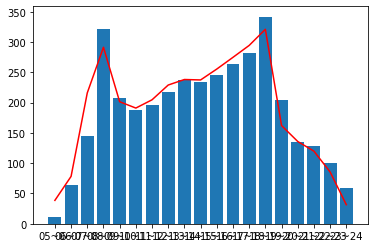

In [8]:
# '하차' -> 빨간색 선 그래프
# '승차' -> 파란색 바 그래프
fig, axes = plt.subplots()
axes.plot(mean_up, color='r')
axes.bar(mean_dw.index, mean_dw.values)

In [9]:
# 각 데이터의 개수를 계산하기 위한 데이터
up_list = up_mean.columns.values
dw_list = dw_mean.columns.values
len(up_list)

19

In [10]:
# 시간대 별 사용자가 가장 많은 수치, 가장 적은 수치
up_min = up_mean.min()
up_max = up_mean.max()
dw_min = dw_mean.min()
dw_max = dw_mean.max()
up_min

05~06     5.1
06~07     7.0
07~08    18.9
08~09    30.4
09~10    21.1
10~11    19.1
11~12    17.4
12~13    19.8
13~14    21.7
14~15    20.3
15~16    20.0
16~17    23.7
17~18    22.9
18~19    17.3
19~20     5.9
20~21     4.5
21~22     5.0
22~23     3.7
23~24     1.7
dtype: float64

In [11]:
up_min_index = []
up_max_index = []
dw_min_index = []
dw_max_index = []

In [12]:
for i in range(0, len(up_list)) :
    up_min_index.append(up_mean[(up_mean.T.iloc[i].values) == up_min.values[i]].index.values[0])
    up_max_index.append(up_mean[(up_mean.T.iloc[i].values) == up_max.values[i]].index.values[0])
    dw_min_index.append(dw_mean[(dw_mean.T.iloc[i].values) == dw_min.values[i]].index.values[0])
    dw_max_index.append(dw_mean[(dw_mean.T.iloc[i].values) == dw_max.values[i]].index.values[0])

In [13]:
df_up = DataFrame(columns=['min','min_역번호','min_역명', 'max', 'max_역번호', 'max_역명'], index=up_list)

for i in range(0, len(up_list)) :
    df_up['min'][i] = up_min.values[i]
    df_up['min_역번호'][i] = up_min_index[i][0]
    df_up['min_역명'][i] = up_min_index[i][1]
    df_up['max'][i] = up_max.values[i]
    df_up['max_역번호'][i] = up_max_index[i][0]
    df_up['max_역명'][i] = up_max_index[i][1]
df_up

,min,min_역번호,min_역명,max,max_역번호,max_역명
05~06,5.1,2380,대공원,99,1200,상인
06~07,7,3130,학정,214.5,1200,상인
07~08,18.9,2380,대공원,673.4,1200,상인
08~09,30.4,2380,대공원,960.5,1200,상인
09~10,21.1,3130,학정,649.2,1200,상인
10~11,19.1,2380,대공원,560.2,1200,상인
11~12,17.4,3130,학정,692.8,2300,반월당2
12~13,19.8,3130,학정,937.7,2300,반월당2
13~14,21.7,3130,학정,1111.5,2300,반월당2
14~15,20.3,3130,학정,1262.3,2300,반월당2


In [14]:
df_dw = DataFrame(columns=['min','min_역번호','min_역명', 'max', 'max_역번호', 'max_역명'], index=dw_list)

for i in range(0, len(dw_list)) :
    df_dw['min'][i] = dw_min.values[i]
    df_dw['min_역번호'][i] = dw_min_index[i][0]
    df_dw['min_역명'][i] = dw_min_index[i][1]
    df_dw['max'][i] = dw_max.values[i]
    df_dw['max_역번호'][i] = dw_max_index[i][0]
    df_dw['max_역명'][i] = dw_max_index[i][1]
df_dw

,min,min_역번호,min_역명,max,max_역번호,max_역명
05~06,0.1,2160,문양,71.4,1330,칠성시장
06~07,4.9,3130,학정,327.1,1350,동대구역
07~08,13.1,3130,학정,523.2,2190,강창
08~09,31.8,3130,학정,1341.2,2300,반월당2
09~10,12.9,3130,학정,1277,2300,반월당2
10~11,14,3130,학정,1093.8,2300,반월당2
11~12,14.8,3130,학정,1197.8,2300,반월당2
12~13,15.4,3130,학정,1373.9,2300,반월당2
13~14,18.8,3130,학정,1486.8,2300,반월당2
14~15,17.4,3130,학정,1442.2,2300,반월당2


In [15]:
# 테이블 이름 지정하기
df_up.name = '승차 테이블'
df_dw.name = '하차 테이블'

In [16]:
# '승차 테이블'과 '하차 테이블' 합치기
# columns 수정해서 3차원으로 바꾸기
df = pd.concat([df_up, df_dw], axis=1)
df.columns = [['up','up','up','up','up','up','dw','dw','dw','dw','dw','dw'], ['min','min_역번호','min_역명', 'max', 'max_역번호', 'max_역명','min','min_역번호','min_역명', 'max', 'max_역번호', 'max_역명']]
df

up                                          dw                 \
        min min_역번호 min_역명     max max_역번호 max_역명   min min_역번호 min_역명   
05~06   5.1    2380    대공원      99    1200     상인   0.1    2160     문양   
06~07     7    3130     학정   214.5    1200     상인   4.9    3130     학정   
07~08  18.9    2380    대공원   673.4    1200     상인  13.1    3130     학정   
08~09  30.4    2380    대공원   960.5    1200     상인  31.8    3130     학정   
09~10  21.1    3130     학정   649.2    1200     상인  12.9    3130     학정   
10~11  19.1    2380    대공원   560.2    1200     상인    14    3130     학정   
11~12  17.4    3130     학정   692.8    2300   반월당2  14.8    3130     학정   
12~13  19.8    3130     학정   937.7    2300   반월당2  15.4    3130     학정   
13~14  21.7    3130     학정  1111.5    2300   반월당2  18.8    3130     학정   
14~15  20.3    3130     학정  1262.3    2300   반월당2  17.4    3130     학정   
15~16    20    3130     학정  1522.4    2300   반월당2  20.6    3130     학정   
16~17  23.7    3130     학정  1696.7    2300   반월당2  22.4    3130     학정   
17~18  22.9    3130     학정  1827.8    2300   반월당2  25.6    3130     학정   
18~19  17.3    3130     학정  2054.4    2300   반월당2  24.1    3130     학정   
19~20   5.9    3130     학정  1400.8    2300   반월당2  11.3    3130     학정   
20~21   4.5    3130     학정  1492.5    2300   반월당2   6.9    3130     학정   
21~22     5    3130     학정  1441.4    2300   반월당2   9.1    3130     학정   
22~23   3.7    3130     학정   952.3    2300   반월당2   6.7    3220     공단   
23~24   1.7    2160     문양   348.5    2300   반월당2   2.9    2380    대공원   

                              
          max max_역번호 max_역명  
05~06    71.4    1330   칠성시장  
06~07   327.1    1350   동대구역  
07~08   523.2    2190     강창  
08~09  1341.2    2300   반월당2  
09~10    1277    2300   반월당2  
10~11  1093.8    2300   반월당2  
11~12  1197.8    2300   반월당2  
12~13  1373.9    2300   반월당2  
13~14  1486.8    2300   반월당2  
14~15  1442.2    2300   반월당2  
15~16  1322.4    2300   반월당2  
16~17  1231.9    2300   반월당2  
17~18  1281.4    2300   반월당2  
18~19  1373.1    2300   반월당2  
19~20   728.6    1200     상인  
20~21   474.5    1350   동대구역  
21~22   483.6    1200     상인  
22~23   352.3    1200     상인  
23~24   223.8    2440    영남대

In [17]:
# 하루 이용객이 2만명 이상인 역과 날짜 추출, 일계 기준으로 내림차순 정렬
data_2m = data[data['일계'] > 20000].sort_values(by='일계', ascending=False)
data_2m.head(10)

,월,일,역번호,역명,승하,05~06,06~07,07~08,08~09,09~10,...,15~16,16~17,17~18,18~19,19~20,20~21,21~22,22~23,23~24,일계
23934,5,12,2300,반월당2,승차,57,97,239,331,374,...,1786,1945,2053,2556,1784,1762,1685,1351,420,22257
23024,5,7,2300,반월당2,승차,63,97,228,330,327,...,1770,1938,2261,2532,1750,1718,1652,1426,636,21821
7372,2,10,2300,반월당2,승차,20,67,166,252,225,...,1725,1998,2288,2425,1752,1668,1896,1949,252,21762
24298,5,14,2300,반월당2,승차,48,111,223,279,316,...,1789,1877,2193,2467,1641,1748,1725,1419,682,21693
21750,4,30,2300,반월당2,승차,67,116,234,317,309,...,1718,1888,2354,2451,1701,1701,1735,1405,677,21624
13014,3,13,2300,반월당2,승차,74,98,99,155,231,...,1937,2197,2351,2213,1788,1878,1569,1273,673,21517
14106,3,19,2300,반월당2,승차,64,97,222,307,328,...,1692,1903,2147,2535,1708,1782,1775,1317,602,21434
9920,2,24,2300,반월당2,승차,36,83,202,272,271,...,1813,2032,2145,2664,1653,1619,1545,1290,443,21363
9010,2,19,2300,반월당2,승차,43,88,185,256,265,...,1791,1983,2138,2576,1817,1624,1614,1296,616,21360
10284,2,26,2300,반월당2,승차,28,76,185,243,330,...,1671,1923,2086,2557,1786,1686,1723,1306,614,21144


In [18]:
# 사용객이 가장 많은 시간대를 차지하는 역의 비율 시각화 (상,하차 통합)
up_max2 = df['up','max_역명'].unique()
dw_max2 = df['dw','max_역명'].unique()
up_max2

array(['상인', '반월당2'], dtype=object)

In [19]:
labels = np.concatenate([up_max2, dw_max2])
labels = np.unique(labels)

In [20]:
ratios_up = [0 for i in range(len(labels))]
ratios_dw = [0 for i in range(len(labels))]
ratios = [0 for i in range(len(labels))]

In [21]:
for i in range(0, len(labels)) :
    ratios_up[i] = df[df['up', 'max_역명']== labels[i]]['up','max_역명'].count()
    ratios_dw[i] = df[df['dw', 'max_역명']== labels[i]]['dw','max_역명'].count()
    ratios[i] = ratios_up[i] + ratios_dw[i]

In [22]:
matplotlib.rcParams['font.family']='Malgun Gothic'

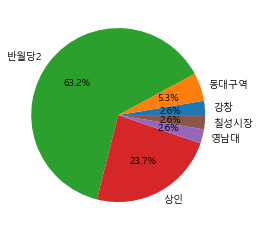

In [23]:
plt.pie(ratios ,labels = labels, autopct='%.1f%%', )
plt.show()

In [24]:
# 지하철 호선 별로 테이블 분리
# 역번호의 첫번째 숫자 == 호선
data_no = data.set_index('역번호')
data_no1 = data_no.filter(regex='^1', axis=0)
data_no1.head(10)

,월,일,역명,승하,05~06,06~07,07~08,08~09,09~10,10~11,...,15~16,16~17,17~18,18~19,19~20,20~21,21~22,22~23,23~24,일계
역번호,,,,,,,,,,,,,,,,,,,,,
1150,1,1,설화명곡,승차,26,25,42,57,68,86,...,132,104,119,81,65,46,37,24,3,1387
1150,1,1,설화명곡,하차,4,32,43,47,45,63,...,93,93,118,126,81,80,98,70,34,1364
1160,1,1,화원,승차,13,16,34,75,78,79,...,177,187,150,76,47,41,37,23,7,1746
1160,1,1,화원,하차,2,20,18,56,67,84,...,152,154,131,105,77,96,122,57,26,1773
1170,1,1,대곡,승차,31,52,64,107,120,153,...,161,191,180,117,63,82,48,40,11,2171
1170,1,1,대곡,하차,1,36,28,74,79,84,...,171,170,195,189,111,136,159,103,32,2069
1180,1,1,진천,승차,24,40,63,102,107,106,...,185,178,226,109,121,75,96,54,19,2155
1180,1,1,진천,하차,4,33,42,75,102,105,...,164,203,189,187,117,102,159,103,49,2228
1190,1,1,월배,승차,19,44,55,68,79,71,...,111,88,100,72,48,49,60,46,18,1370


In [25]:
data_no2 = data_no.filter(regex='^2', axis=0)
data_no2.head(10)

,월,일,역명,승하,05~06,06~07,07~08,08~09,09~10,10~11,...,15~16,16~17,17~18,18~19,19~20,20~21,21~22,22~23,23~24,일계
역번호,,,,,,,,,,,,,,,,,,,,,
2160,1,1,문양,승차,2,8,16,43,45,54,...,137,149,110,82,33,14,8,3,0,1056
2160,1,1,문양,하차,0,19,49,64,72,143,...,66,54,54,33,30,19,18,3,3,1027
2170,1,1,다사,승차,20,22,38,42,31,56,...,65,44,44,26,25,18,17,13,4,690
2170,1,1,다사,하차,0,19,19,17,33,26,...,62,52,58,45,41,45,47,25,27,679
2180,1,1,대실,승차,20,53,60,107,116,107,...,161,122,146,91,76,81,71,45,23,1769
2180,1,1,대실,하차,3,81,50,56,94,63,...,126,163,137,140,132,90,115,86,32,1779
2190,1,1,강창,승차,13,24,86,73,60,80,...,162,135,133,97,61,59,52,78,7,1566
2190,1,1,강창,하차,3,105,83,51,53,51,...,63,97,109,110,84,119,121,67,38,1492
2200,1,1,계명대,승차,22,38,58,83,73,87,...,199,178,169,125,85,71,98,31,21,1913


In [26]:
data_no3 = data_no.filter(regex='^2', axis=0)
data_no3.head(10)

,월,일,역명,승하,05~06,06~07,07~08,08~09,09~10,10~11,...,15~16,16~17,17~18,18~19,19~20,20~21,21~22,22~23,23~24,일계
역번호,,,,,,,,,,,,,,,,,,,,,
2160,1,1,문양,승차,2,8,16,43,45,54,...,137,149,110,82,33,14,8,3,0,1056
2160,1,1,문양,하차,0,19,49,64,72,143,...,66,54,54,33,30,19,18,3,3,1027
2170,1,1,다사,승차,20,22,38,42,31,56,...,65,44,44,26,25,18,17,13,4,690
2170,1,1,다사,하차,0,19,19,17,33,26,...,62,52,58,45,41,45,47,25,27,679
2180,1,1,대실,승차,20,53,60,107,116,107,...,161,122,146,91,76,81,71,45,23,1769
2180,1,1,대실,하차,3,81,50,56,94,63,...,126,163,137,140,132,90,115,86,32,1779
2190,1,1,강창,승차,13,24,86,73,60,80,...,162,135,133,97,61,59,52,78,7,1566
2190,1,1,강창,하차,3,105,83,51,53,51,...,63,97,109,110,84,119,121,67,38,1492
2200,1,1,계명대,승차,22,38,58,83,73,87,...,199,178,169,125,85,71,98,31,21,1913


In [27]:
# 각 호선 별 역 번호 추출
line1 = []
line2 = []
line3 = []

In [28]:
line1 = np.unique(data_no1.index.values)
line2 = np.unique(data_no2.index.values)
line3 = np.unique(data_no3.index.values)
line1

array([1150, 1160, 1170, 1180, 1190, 1200, 1210, 1220, 1230, 1240, 1250,
       1260, 1270, 1280, 1290, 1300, 1310, 1320, 1330, 1340, 1350, 1360,
       1370, 1380, 1390, 1400, 1410, 1420, 1430, 1440, 1450, 1460],
      dtype=int64)

In [29]:
# 환승역은 역명 뒤 1, 2, 3으로 구분되어 중복되게 저장되어 있음
# 지하철 1호선 환승역 데이터 추출
transfer = data.set_index('역명')
t1 = transfer.filter(regex='1$', axis=0).index.unique()
t1

Index(['명덕1', '반월당1'], dtype='object', name='역명')

In [30]:
# 지하철 2호선 환승역 데이터 추출
transfer = data.set_index('역명')
t2 = transfer.filter(regex='2$', axis=0).index.unique()
t2

Index(['청라언덕2', '반월당2'], dtype='object', name='역명')

In [31]:
# 지하철 3호선 환승역 데이터 추출
transfer = data.set_index('역명')
t3 = transfer.filter(regex='3$', axis=0).index.unique()
t3

Index(['청라언덕3', '명덕3'], dtype='object', name='역명')

In [32]:
# 추출한 환승역 이름으로 역 번호 찾기
data[data['역명']==t1[0]][['역번호','역명']].drop_duplicates()

,역번호,역명
28,1290,명덕1


In [33]:
# 지도에 환승역 표시하기
map = folium.Map(location=[35.85,128.57], zoom_start=13)

In [34]:
station1=folium.Marker(location=[35.864592,128.593409], popup = data[data['역명']==t1[1]][['역번호','역명']].drop_duplicates().values)
station1.add_to(map)
station2=folium.Marker(location=[35.8652504,128.5808644], popup = data[data['역명']==t2[0]][['역번호','역명']].drop_duplicates().values)
station2.add_to(map)
station3=folium.Marker(location=[35.8600447,128.5868891], popup = data[data['역명']==t3[1]][['역번호','역명']].drop_duplicates().values)
station3.add_to(map)
map